In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dim_date_path = "/content/gdrive/MyDrive/Dataset/dim_date.csv"
dim_hotels_path = "/content/gdrive/MyDrive/Dataset/dim_hotels.csv"
dim_rooms_path = "/content/gdrive/MyDrive/Dataset/dim_rooms.csv"
fact_booking_path = "/content/gdrive/MyDrive/Dataset/fact_bookings.csv"
fact_aggregated_bookings_path = "/content/gdrive/MyDrive/Dataset/fact_aggregated_bookings.csv"

dim_date = pd.read_csv(dim_date_path)
dim_hotels = pd.read_csv(dim_hotels_path)
dim_rooms = pd.read_csv(dim_rooms_path)
fact_booking = pd.read_csv(fact_booking_path)
fact_aggregated_bookings = pd.read_csv(fact_aggregated_bookings_path)




In [ ]:
dim_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [ ]:
dim_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [ ]:
dim_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [ ]:
fact_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


In [ ]:
fact_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18
9196,16559,31-Jul-22,RT4,13,18
9197,17558,31-Jul-22,RT4,3,6
9198,19563,31-Jul-22,RT4,3,6


In [ ]:
 aggregated_data = pd.merge(dim_hotels,fact_aggregated_bookings,left_on='property_id',right_on='property_id',how = 'right')
 aggregated_data = pd.merge(aggregated_data,dim_rooms,right_on ='room_id',left_on = 'room_category',how = 'left')
 aggregated_data = pd.merge(aggregated_data,dim_date,right_on = 'date',left_on = 'check_in_date',how='left')
 aggregated_data

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,room_id,room_class,date,mmm yy,week no,day_type
0,16559,Atliq Exotica,Luxury,Mumbai,01-May-22,RT1,25,30,RT1,Standard,01-May-22,May 22,W 19,weekend
1,19562,Atliq Bay,Luxury,Bangalore,01-May-22,RT1,28,30,RT1,Standard,01-May-22,May 22,W 19,weekend
2,19563,Atliq Palace,Business,Bangalore,01-May-22,RT1,23,30,RT1,Standard,01-May-22,May 22,W 19,weekend
3,17558,Atliq Grands,Luxury,Mumbai,01-May-22,RT1,13,19,RT1,Standard,01-May-22,May 22,W 19,weekend
4,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT1,18,19,RT1,Standard,01-May-22,May 22,W 19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,16563,Atliq Palace,Business,Delhi,31-Jul-22,RT4,13,18,RT4,Presidential,31-Jul-22,Jul 22,W 32,weekend
9196,16559,Atliq Exotica,Luxury,Mumbai,31-Jul-22,RT4,13,18,RT4,Presidential,31-Jul-22,Jul 22,W 32,weekend
9197,17558,Atliq Grands,Luxury,Mumbai,31-Jul-22,RT4,3,6,RT4,Presidential,31-Jul-22,Jul 22,W 32,weekend
9198,19563,Atliq Palace,Business,Bangalore,31-Jul-22,RT4,3,6,RT4,Presidential,31-Jul-22,Jul 22,W 32,weekend


In [ ]:
booking_data= pd.merge(fact_booking,dim_hotels, right_on = 'property_id',left_on = 'property_id',how = 'left')
booking_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [ ]:
input_date = "2022-10-01"

# Convert to datetime format
date_obj = pd.to_datetime(input_date)

# Format the date as "1st October 2022"
formatted_date = date_obj.strftime("%dth %B %Y")

print(formatted_date.replace(" ", "-"))

01th-October-2022


In [ ]:
def formatting(date):
    date_obj = pd.to_datetime(date)
    formatted_date = date_obj.strftime("%Y-%m-%d")
    return formatted_date

aggregated_data['check_in_date'] = aggregated_data['check_in_date'].map(formatting)

In [ ]:
dim_date['date'] = dim_date['date'].map(formatting)
dim_date

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday
...,...,...,...,...
87,2022-07-27,Jul 22,W 31,weekeday
88,2022-07-28,Jul 22,W 31,weekeday
89,2022-07-29,Jul 22,W 31,weekeday
90,2022-07-30,Jul 22,W 31,weekend


In [ ]:
booking_data = pd.merge(booking_data , dim_date, right_on = "date",left_on = "booking_date",how = "left")
booking_data = pd.merge(booking_data , dim_rooms , right_on = "room_id", left_on = "room_category", how = "left")
booking_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type,room_id,room_class
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,...,10010,Atliq Grands,Luxury,Delhi,NaN,NaN,NaN,NaN,RT1,Standard
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,...,3640,Atliq Grands,Luxury,Delhi,NaN,NaN,NaN,NaN,RT1,Standard
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,...,9100,Atliq Grands,Luxury,Delhi,NaN,NaN,NaN,NaN,RT1,Standard
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,...,3640,Atliq Grands,Luxury,Delhi,NaN,NaN,NaN,NaN,RT1,Standard
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,...,10920,Atliq Grands,Luxury,Delhi,NaN,NaN,NaN,NaN,RT1,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,...,32300,Atliq Seasons,Business,Mumbai,2022-07-29,Jul 22,W 31,weekeday,RT4,Presidential
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,...,38760,Atliq Seasons,Business,Mumbai,2022-07-30,Jul 22,W 31,weekend,RT4,Presidential
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,...,12920,Atliq Seasons,Business,Mumbai,2022-07-30,Jul 22,W 31,weekend,RT4,Presidential
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,...,32300,Atliq Seasons,Business,Mumbai,2022-07-29,Jul 22,W 31,weekeday,RT4,Presidential


In [ ]:
booking_data.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized', 'property_name', 'category', 'city', 'date',
       'mmm yy', 'week no', 'day_type', 'room_id', 'room_class'],
      dtype='object')

In [ ]:
selected_data = booking_data.iloc[:, 15:]
selected_data

,date,mmm yy,week no,day_type,room_id,room_class
0,NaN,NaN,NaN,NaN,RT1,Standard
1,NaN,NaN,NaN,NaN,RT1,Standard
2,NaN,NaN,NaN,NaN,RT1,Standard
3,NaN,NaN,NaN,NaN,RT1,Standard
4,NaN,NaN,NaN,NaN,RT1,Standard
...,...,...,...,...,...,...
134585,2022-07-29,Jul 22,W 31,weekeday,RT4,Presidential
134586,2022-07-30,Jul 22,W 31,weekend,RT4,Presidential
134587,2022-07-30,Jul 22,W 31,weekend,RT4,Presidential
134588,2022-07-29,Jul 22,W 31,weekeday,RT4,Presidential


In [ ]:
#lets finally clean "booking_data" datset and "aggregated_Data" by removing duplicated and unknown columns

booking_data = booking_data.drop(columns = ['booking_id','property_id' , 'room_category' , 'room_id','date',	'mmm yy',	'week no'])
booking_data

,booking_date,check_in_date,checkout_date,no_guests,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,day_type,room_class
0,2022-04-27,2022-05-01,2022-05-02,3,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,NaN,Standard
1,2022-04-30,2022-05-01,2022-05-02,2,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,NaN,Standard
2,2022-04-28,2022-05-01,2022-05-04,2,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,NaN,Standard
3,2022-04-28,2022-05-01,2022-05-02,2,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,NaN,Standard
4,2022-04-27,2022-05-01,2022-05-02,4,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,NaN,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,2022-07-29,2022-07-31,2022-08-03,1,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,weekeday,Presidential
134586,2022-07-30,2022-07-31,2022-08-01,4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai,weekend,Presidential
134587,2022-07-30,2022-07-31,2022-08-02,1,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai,weekend,Presidential
134588,2022-07-29,2022-07-31,2022-08-01,2,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,weekeday,Presidential


In [ ]:
aggregated_data = aggregated_data.drop(columns = ['property_id','date','mmm yy','week no','room_category','room_id'])
aggregated_data

,property_name,category,city,check_in_date,successful_bookings,capacity,room_class,day_type
0,Atliq Exotica,Luxury,Mumbai,2022-05-01,25,30,Standard,weekend
1,Atliq Bay,Luxury,Bangalore,2022-05-01,28,30,Standard,weekend
2,Atliq Palace,Business,Bangalore,2022-05-01,23,30,Standard,weekend
3,Atliq Grands,Luxury,Mumbai,2022-05-01,13,19,Standard,weekend
4,Atliq Grands,Luxury,Delhi,2022-05-01,18,19,Standard,weekend
...,...,...,...,...,...,...,...,...
9195,Atliq Palace,Business,Delhi,2022-07-31,13,18,Presidential,weekend
9196,Atliq Exotica,Luxury,Mumbai,2022-07-31,13,18,Presidential,weekend
9197,Atliq Grands,Luxury,Mumbai,2022-07-31,3,6,Presidential,weekend
9198,Atliq Palace,Business,Bangalore,2022-07-31,3,6,Presidential,weekend


In [ ]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 2.3 MB/s eta 0:00:00


In [ ]:
with pd.ExcelWriter('/content/output_excel_file.xlsx', engine='xlsxwriter') as writer:
    booking_data.to_excel(writer, sheet_name='Booking_Details', index=False)
    aggregated_data.to_excel(writer, sheet_name='Revenue_Details', index=False)

from google.colab import files
files.download('/content/output_excel_file.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

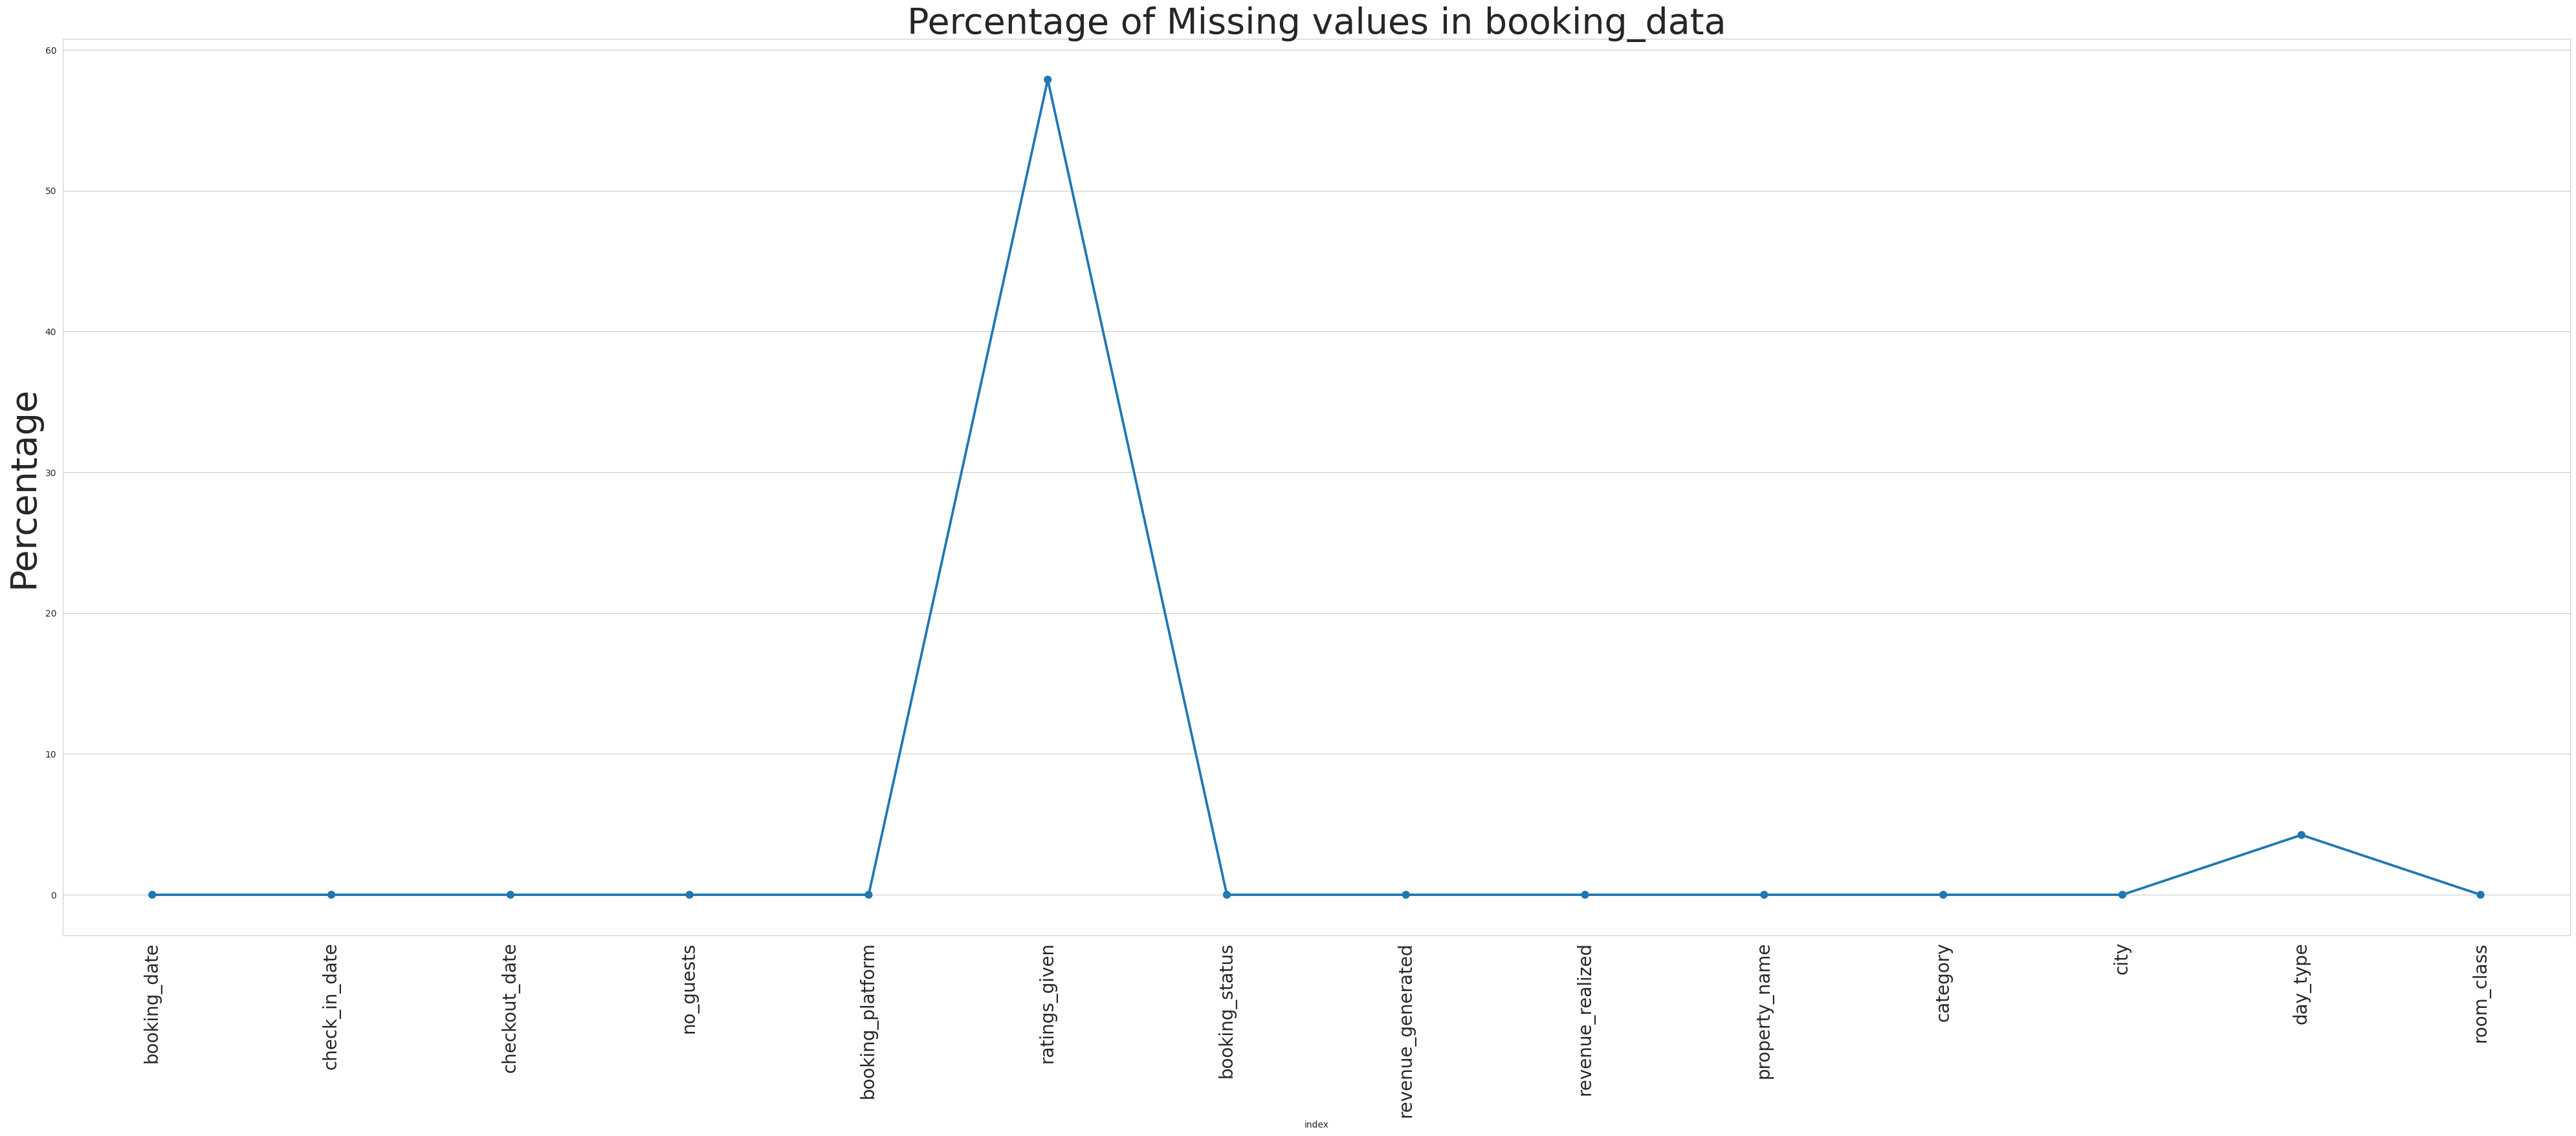

In [ ]:
fig,ax = plt.subplots(figsize=(50,18))
miss_previous_application = pd.DataFrame((booking_data.isnull().sum())*100/booking_data.shape[0]).reset_index()
miss_previous_application["type"] = "booking_data"

sns.pointplot(x="index", y=0, data=miss_previous_application, ax=ax )

# Customize the plot
plt.xticks(rotation=90, fontsize=20)
plt.title("Percentage of Missing values in booking_data" , font = {'size' :40})
plt.ylabel("Percentage" ,font ={'size' : 40})

sns.set_style("whitegrid")


# Show the plot
plt.show()

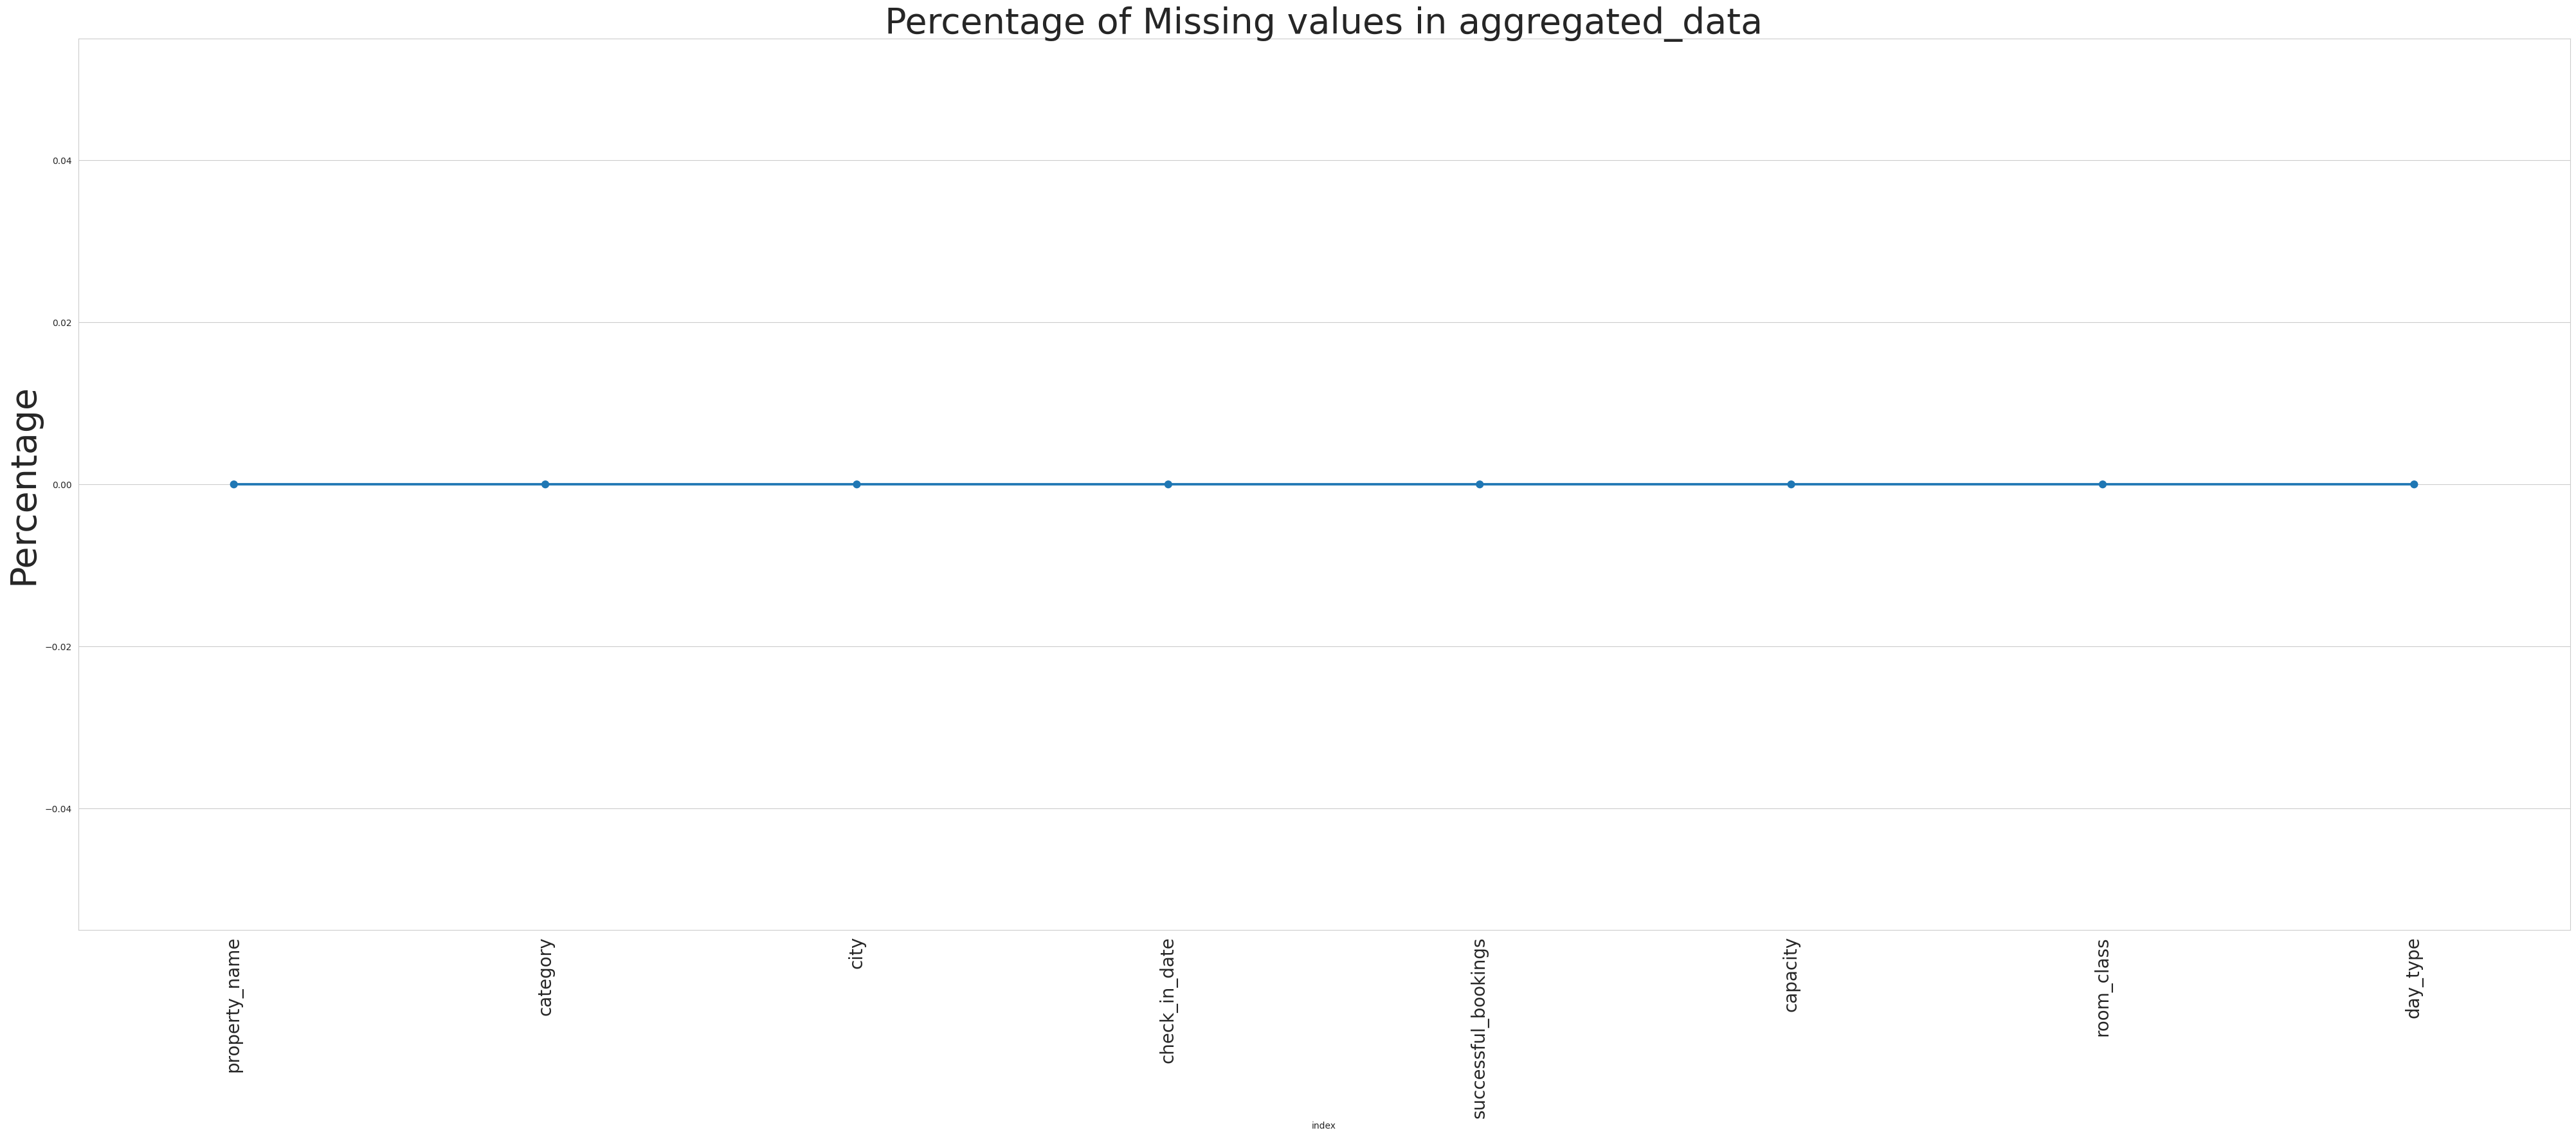

In [ ]:
fig,ax = plt.subplots(figsize=(50,18))
miss_previous_application = pd.DataFrame((aggregated_data.isnull().sum())*100/aggregated_data.shape[0]).reset_index()
miss_previous_application["type"] = "aggregated_data"

sns.pointplot(x="index", y=0, data=miss_previous_application, ax=ax )

# Customize the plot
plt.xticks(rotation=90, fontsize=20)
plt.title("Percentage of Missing values in aggregated_data" , font = {'size' :40})
plt.ylabel("Percentage" ,font ={'size' : 40})

sns.set_style("whitegrid")


# Show the plot
plt.show()